# 第3章 測定

In [1]:
ENV["LINES"] = 10
ENV["COLUMNS"] = 1000

1000

In [69]:
import Cairo
using DataFrames, DataFramesMeta, CSV, FreqTables, Gadfly, Statistics, Clustering

## 3.1

In [5]:
afghan_df = CSV.read("../../data/MEASUREMENT/afghan.csv", DataFrame, missingstring=["NA"])

2754×11 DataFrame
  Row │ province  district        village.id  age    educ.years  employed  inc ⋯
      │ String7   String15        Int64       Int64  Int64       Int64     Str ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Logar     Baraki Barak            80     26          10         0  2,0 ⋯
    2 │ Logar     Baraki Barak            80     49           3         1  2,0
    3 │ Logar     Baraki Barak            80     60           0         1  2,0
    4 │ Logar     Baraki Barak            80     34          14         1  2,0
    5 │ Logar     Baraki Barak            80     21          12         1  2,0 ⋯
    6 │ Logar     Baraki Barak            80     18          10         1  mis
    7 │ Logar     Baraki Barak            80     42           6         1  10,
    8 │ Logar     Baraki Barak            80     39          12         1  2,0
  ⋮   │    ⋮            ⋮             ⋮         ⋮        ⋮          ⋮          ⋱
 2748 │ Uruzgan   Shahidi Hassas          28     28           0         0  2,0 ⋯
 2749 │ Uruzgan   Shahidi Hassas          28     28           0         1  2,0
 2750 │ Uruzgan   Shahidi Hassas          28     30           0         0  les
 2751 │ Uruzgan   Shahidi Hassas          28     19           0         1  2,0
 2752 │ Uruzgan   Shahidi Hassas          28     25           5         1  2,0 ⋯
 2753 │ Uruzgan   Shahidi Hassas          28     32           0         1  les
 2754 │ Uruzgan   Shahidi Hassas          28     18           0         0  les
                                                 5 columns and 2739 rows omitted

In [4]:
describe(afghan_df, :all) |> println

11×13 DataFrame
 Row │ variable             mean      std       min            q25     median  q75     max          nunique  nmissing  first         last             eltype                   
     │ Symbol               Union…    Union…    Any            Union…  Union…  Union…  Any          Union…   Int64     Any           Any              Type                     
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ province                                 Helmand                                Uruzgan      5               0  Logar         Uruzgan          String7
   2 │ district                                 Asadabad                               Wata Pur     21              0  Baraki Barak  Shahidi Hassas   String15
   3 │ village.id           103.621   58.923    1              53.0    104.5   153.0   204                          0  80            28    

In [5]:
prop(freqtable(afghan_df, Symbol("violent.exp.ISAF"), Symbol("violent.exp.taliban")))

3×3 Named Matrix{Float64}
violent.exp.ISAF ╲ violent.exp.taliban │          0           1     missing
───────────────────────────────────────┼───────────────────────────────────
0                                      │   0.482934     0.12854  0.00798838
1                                      │   0.172476    0.190995  0.00798838
missing                                │ 0.00254176  0.00290487  0.00363108

In [6]:
afghan_df |> dropmissing |> nrow

2554

In [7]:
@rsubset(afghan_df, !ismissing(:income)) |> nrow

2600

## 3.3

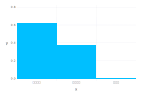

In [25]:
prop_table = prop(freqtable(afghan_df, Symbol("violent.exp.ISAF")))
plot(x = ["被害なし", "被害あり", "無回答"], y = prop_table, Geom.bar)

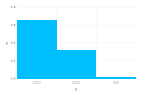

In [26]:
prop_table = prop(freqtable(afghan_df, Symbol("violent.exp.taliban")))
plot(x = ["被害なし", "被害あり", "無回答"], y = prop_table, Geom.bar)

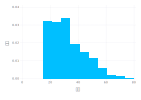

In [36]:
@chain afghan_df begin
    plot(x = :age, Geom.histogram(bincount=10, density=true), Guide.xlabel("年齢"), Guide.ylabel("密度"))
end

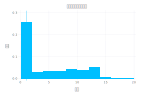

In [53]:
@chain afghan_df begin
    # plot(x = Symbol("educ.years"), Geom.histogram(bincount=10, density=true), Guide.xlabel("年齢"), Guide.ylabel("密度"), Guide.title("回答者の教育年齢分布"))
    plot(x = Symbol("educ.years"), Geom.histogram(bincount=10, density=true), Guide.xlabel("年齢"), Guide.ylabel("密度"), Guide.title("回答者の教育年齢分布"), xintercept=[median(afghan_df[:, "educ.years"])], Geom.vline())
end

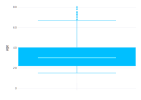

In [57]:
@chain afghan_df begin
    plot(y = :age, Geom.boxplot)
end

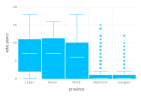

In [58]:
@chain afghan_df begin
    plot(x = :province, y = Symbol("educ.years"), Geom.boxplot)
end

In [71]:
@chain afghan_df begin
    rename("violent.exp.ISAF" => :violent_exp_ISAF)
    rename("violent.exp.taliban" => :violent_exp_taliban)
    groupby(:province)
    @combine begin
        :ISAF_mean = mean(skipmissing(:violent_exp_ISAF))
        :taliban_mean = mean(skipmissing(:violent_exp_taliban))
        # :ISAF_mean = mean(Symbol("violent.exp.ISAF"))
        # :taliban_mean = mean(Symbol("violent.exp.taliban"))
    end
end

5×3 DataFrame
 Row │ province  ISAF_mean  taliban_mean 
     │ String7   Float64    Float64      
─────┼───────────────────────────────────
   1 │ Logar      0.144033     0.0802469
  ⋮  │    ⋮          ⋮           ⋮
                           4 rows omitted

In [75]:
plot(afghan_df, x = :province, y = Symbol("educ.years"), Geom.boxplot) |> PDF("./plot.pdf")


(process:421): Pango-CRITICAL **: 03:46:31.821: pango_font_describe: assertion 'font != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.821: pango_font_description_get_variant: assertion 'desc != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_describe: assertion 'font != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_description_get_variant: assertion 'desc != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_describe: assertion 'font != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_description_get_variant: assertion 'desc != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_describe: assertion 'font != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_description_get_variant: assertion 'desc != NULL' failed

(process:421): Pango-CRITICAL **: 03:46:31.822: pango_font_describe: assertion 'font != NULL' failed

(process:421): Pango-

## 3.4

In [79]:
afghan_village_df = CSV.read("../../data/MEASUREMENT/afghan-village.csv", DataFrame, missingstring=["NA"])

1864×3 DataFrame
  Row │ altitude  population  village.surveyed 
      │ Float64   Int64       Int64            
──────┼────────────────────────────────────────
    1 │  1959.08         197                 1
  ⋮   │    ⋮          ⋮              ⋮
                              1863 rows omitted

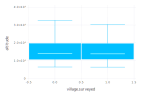

In [81]:
@chain afghan_village_df begin
    plot(x = Symbol("village.surveyed"), y = :altitude, Geom.boxplot)
end

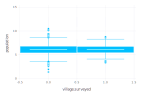

In [83]:
@chain afghan_village_df begin
    @rtransform(:population = log(:population))
    plot(x = Symbol("village.surveyed"), y = :population, Geom.boxplot)
end

In [85]:
@chain afghan_df begin
    rename("violent.exp.ISAF" => :violent_exp_ISAF)
    rename("violent.exp.taliban" => :violent_exp_taliban)
    groupby(:province)
    @combine begin
        :missing_ISAF = mean(ismissing.(:violent_exp_ISAF))
        :missing_taliban = mean(ismissing.(:violent_exp_taliban))
    end
end

5×3 DataFrame
 Row │ province  missing_ISAF  missing_taliban 
     │ String7   Float64       Float64         
─────┼─────────────────────────────────────────
   1 │ Logar        0.0             0.0
  ⋮  │    ⋮           ⋮               ⋮
                                 4 rows omitted

In [10]:
@chain afghan_df begin
    rename("list.group" => :list_group, "list.response" => :list_response)
    groupby(:list_group)
    @combine begin
        :response_mean = mean(skipmissing(:list_response))
    end
end

3×2 DataFrame
 Row │ list_group  response_mean 
     │ String7     Float64       
─────┼───────────────────────────
   1 │ control           1.51961
   2 │ ISAF              1.56863
   3 │ taliban           1.74401

In [14]:
freqtable(afghan_df, Symbol("list.group"), Symbol("list.response"))

3×5 Named Matrix{Int64}
list.group ╲ list.response │   0    1    2    3    4
───────────────────────────┼────────────────────────
"ISAF"                     │ 174  278  260  182   24
"control"                  │ 188  265  265  200    0
"taliban"                  │   0  433  287  198    0

## 3.5

In [15]:
congress_df = CSV.read("../../data/MEASUREMENT/congress.csv", DataFrame, missingstring=["NA"])

14552×7 DataFrame
   Row │ congress  district  state    party       name         dwnom1   dwnom2 ⋯
       │ Int64     Int64     String7  String15    String15     Float64  Float6 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │       80         0  USA      Democrat    TRUMAN        -0.276    0.01 ⋯
     2 │       80         1  ALABAMA  Democrat    BOYKIN  F.    -0.026    0.79
     3 │       80         2  ALABAMA  Democrat    GRANT  G.     -0.042    0.99
     4 │       80         3  ALABAMA  Democrat    ANDREWS  G.   -0.008    1.00
     5 │       80         4  ALABAMA  Democrat    HOBBS  S.     -0.082    1.06 ⋯
     6 │       80         5  ALABAMA  Democrat    RAINS  A.     -0.17     0.87
     7 │       80         6  ALABAMA  Democrat    JARMAN  P.    -0.124    0.99
     8 │       80         7  ALABAMA  Democrat    MANASCO  C.   -0.031    0.89
   ⋮   │    ⋮         ⋮         ⋮         ⋮            ⋮          ⋮        ⋮   ⋱
 14546 │      112         3  WISCONS  Democrat    KIND          -0.294    0.46 ⋯
 14547 │      112         4  WISCONS  Democrat    MOORE         -0.538   -0.45
 14548 │      112         5  WISCONS  Republican  SENSENBR       1.2     -0.43
 14549 │      112         6  WISCONS  Republican  PETRI          0.776   -0.00
 14550 │      112         7  WISCONS  Republican  DUFFY          0.781   -0.27 ⋯
 14551 │      112         8  WISCONS  Republican  RIBBLE         0.886   -0.19
 14552 │      112         1  WYOMING  Republican  LUMMIS         0.932   -0.21
                                                 1 column and 14537 rows omitted

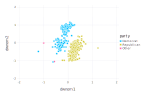

In [21]:
@chain congress_df begin
    @rsubset(:congress == 80)
    plot(x = :dwnom1, y = :dwnom2, color = :party, Geom.point)
end

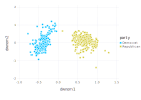

In [22]:
@chain congress_df begin
    @rsubset(:congress == 112)
    plot(x = :dwnom1, y = :dwnom2, color = :party, Geom.point)
end

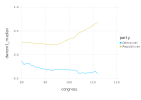

In [24]:
@chain congress_df begin
    @rsubset(:party != "Other")
    groupby([:congress, :party])
    @combine begin
        :dwnom1_median = median(:dwnom1)
    end
    plot(x = :congress, y = :dwnom1_median, color = :party, Geom.line)
end

In [25]:
usgini_df = CSV.read("../../data/MEASUREMENT/USGini.csv", DataFrame, missingstring=["NA"])

67×3 DataFrame
 Row │ Column1  year   gini    
     │ Int64    Int64  Float64 
─────┼─────────────────────────
   1 │       1   1947    0.376
   2 │       2   1948    0.371
   3 │       3   1949    0.378
   4 │       4   1950    0.379
   5 │       5   1951    0.363
   6 │       6   1952    0.368
   7 │       7   1953    0.359
   8 │       8   1954    0.371
  ⋮  │    ⋮       ⋮       ⋮
  61 │      61   2007    0.432
  62 │      62   2008    0.438
  63 │      63   2009    0.443
  64 │      64   2010    0.44
  65 │      65   2011    0.45
  66 │      66   2012    0.451
  67 │      67   2013    0.448
                52 rows omitted

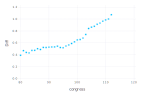

In [32]:
@chain congress_df begin
    @rsubset(:party != "Other")
    groupby([:congress, :party])
    @combine begin
        :dwnom1_median = median(:dwnom1)
    end
    unstack(:congress, :party, :dwnom1_median)
    @rtransform(:Diff = :Republican - :Democrat)
    plot(x = :congress, y = :Diff, Geom.point)
end

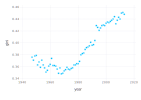

In [33]:
@chain usgini_df begin
    plot(x = :year, y = :gini, Geom.point)
end

In [57]:
congress_med_df = @chain congress_df begin
    @rsubset(:party != "Other")
    groupby([:congress, :party])
    @combine begin
        :dwnom1_median = median(:dwnom1)
    end
    unstack(:congress, :party, :dwnom1_median)
    @rtransform(:Diff = :Republican - :Democrat)
end
cor(congress_med_df.Diff, usgini_df.gini[2:2:end])

0.9418128160619335

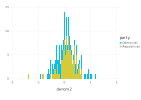

In [59]:
@chain congress_df begin
    @rsubset(:party != "Other")
    @rsubset(:congress == 112)
    plot(x = :dwnom2, color = :party, Geom.histogram)
end

In [66]:
dem112_df = @rsubset(congress_df, :congress == 112, :party == "Democrat")
rep112_df = @rsubset(congress_df, :congress == 112, :party == "Republican")
plot(x = dem112_df.dwnom2, y = rep112_df.dwnom2, Stat.qq, Geom.point)

Plot(...)

## 3.7

In [70]:
dwnom80_df = @rsubset(congress_df, :congress == 80)
dwnom112_df = @rsubset(congress_df, :congress == 112)

443×7 DataFrame
 Row │ congress  district  state    party       name      dwnom1   dwnom2  
     │ Int64     Int64     String7  String15    String15  Float64  Float64 
─────┼─────────────────────────────────────────────────────────────────────
   1 │      112         0  USA      Democrat    OBAMA      -0.286   -0.121
   2 │      112         1  ALABAMA  Republican  BONNER      0.46     0.472
   3 │      112         2  ALABAMA  Republican  ROBY        0.443    0.631
   4 │      112         3  ALABAMA  Republican  ROGERS      0.426    0.413
   5 │      112         4  ALABAMA  Republican  ADERHOLT    0.467    0.397
   6 │      112         5  ALABAMA  Republican  BROOKS      0.797   -0.044
   7 │      112         6  ALABAMA  Republican  BACHUS      0.586    0.191
   8 │      112         7  ALABAMA  Democrat    SEWELL     -0.306    0.351
  ⋮  │    ⋮         ⋮         ⋮         ⋮          ⋮         ⋮        ⋮
 437 │      112         3  WISCONS  Democrat    KIND       -0.294    0.464
 438 │      112         4  WISCONS  Democrat    MOORE      -0.538   -0.458
 439 │      112         5  WISCONS  Republican  SENSENBR    1.2     -0.438
 440 │      112         6  WISCONS  Republican  PETRI       0.776   -0.003
 441 │      112         7  WISCONS  Republican  DUFFY       0.781   -0.27
 442 │      112         8  WISCONS  Republican  RIBBLE      0.886   -0.193
 443 │      112         1  WYOMING  Republican  LUMMIS      0.932   -0.211
                                                           428 rows omitted

In [82]:
dwnom80 = kmeans(Matrix(dwnom80_df[:, [:dwnom1, :dwnom2]])', 2)
dwnom112 = kmeans(Matrix(dwnom112_df[:, [:dwnom1, :dwnom2]])', 2)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.3937600002810359 0.6753251025522197; 0.02945499981346073 0.09296707810743986], [1, 2, 2, 2, 2, 2, 2, 1, 2, 2  …  1, 2, 1, 1, 1, 2, 2, 2, 2, 2], [0.034248921554643236, 0.19003085424275412, 0.34345436453786093, 0.16458407039792766, 0.1358353717575318, 0.03356475888418009, 0.017589423135725424, 0.11109301285155465, 0.031102962452122185, 0.010662021481370187  …  0.7524450223119112, 0.1363988310756019, 0.053384129065583596, 0.19878140328715832, 0.2584175549694197, 0.557209829246704, 0.0193451196701373, 0.1429122953584987, 0.12616107484649963, 0.1582779752525043], [200, 243], [200, 243], 65.9178313041487, 3, true)

In [83]:
dwnom80.centers

2×2 Matrix{Float64}:
 -0.056058   0.152127
  0.76863   -0.343539

In [84]:
dwnom112.centers

2×2 Matrix{Float64}:
 -0.39376   0.675325
  0.029455  0.0929671

In [87]:
@transform!(dwnom80_df, :cluster = assignments(dwnom80))
@transform!(dwnom112_df, :cluster = assignments(dwnom112))

443×8 DataFrame
 Row │ congress  district  state    party       name      dwnom1   dwnom2   cl ⋯
     │ Int64     Int64     String7  String15    String15  Float64  Float64  In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      112         0  USA      Democrat    OBAMA      -0.286   -0.121     ⋯
   2 │      112         1  ALABAMA  Republican  BONNER      0.46     0.472
   3 │      112         2  ALABAMA  Republican  ROBY        0.443    0.631
   4 │      112         3  ALABAMA  Republican  ROGERS      0.426    0.413
   5 │      112         4  ALABAMA  Republican  ADERHOLT    0.467    0.397     ⋯
   6 │      112         5  ALABAMA  Republican  BROOKS      0.797   -0.044
   7 │      112         6  ALABAMA  Republican  BACHUS      0.586    0.191
   8 │      112         7  ALABAMA  Democrat    SEWELL     -0.306    0.351
  ⋮  │    ⋮         ⋮         ⋮         ⋮          ⋮         ⋮        ⋮        ⋱
 437 │      112         3  WISCONS  Democrat    KIND       -0.294    0.464     ⋯
 438 │      112         4  WISCONS  Democrat    MOORE      -0.538   -0.458
 439 │      112         5  WISCONS  Republican  SENSENBR    1.2     -0.438
 440 │      112         6  WISCONS  Republican  PETRI       0.776   -0.003
 441 │      112         7  WISCONS  Republican  DUFFY       0.781   -0.27      ⋯
 442 │      112         8  WISCONS  Republican  RIBBLE      0.886   -0.193
 443 │      112         1  WYOMING  Republican  LUMMIS      0.932   -0.211
                                                   1 column and 428 rows omitted

In [88]:
freqtable(dwnom80_df, :party, :cluster)

3×2 Named Matrix{Int64}
party ╲ cluster │   1    2
────────────────┼─────────
"Democrat"      │ 135   59
"Other"         │   0    2
"Republican"    │   3  247

In [89]:
freqtable(dwnom112_df, :party, :cluster)

2×2 Named Matrix{Int64}
party ╲ cluster │   1    2
────────────────┼─────────
"Democrat"      │ 200    0
"Republican"    │   0  243

In [92]:
dwnom80_four = kmeans(Matrix(dwnom80_df[:, [:dwnom1, :dwnom2]])', 4)
dwnom112_four = kmeans(Matrix(dwnom112_df[:, [:dwnom1, :dwnom2]])', 4)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.2502368410166942 -0.4630886089952686 -0.3875238093591872 0.6776735533860104; 0.7128157890156693 -0.34960759497141536 0.08435714250524703 0.0906115702169655], [3, 4, 4, 4, 4, 4, 4, 3, 4, 4  …  1, 4, 2, 1, 2, 4, 4, 4, 4, 4], [0.052478636864457806, 0.19283890876556387, 0.34709131789342174, 0.16727386961814816, 0.13825722184461653, 0.03235907347143763, 0.018481872519302334, 0.07774455172704675, 0.03218750517457636, 0.010011233733664637  …  0.03812219538134354, 0.13401175322500225, 0.05346687642706072, 0.06382451757091856, 0.017360629043016162, 0.5522551520069165, 0.018431220688129857, 0.14071707062661587, 0.12383542387815893, 0.1556514685442305], [38, 79, 84, 242], [38, 79, 84, 242], 35.40372890422436, 20, true)

In [93]:
@transform!(dwnom80_df, :cluster_four = assignments(dwnom80_four))
@transform!(dwnom112_df, :cluster_four = assignments(dwnom112_four))

443×9 DataFrame
 Row │ congress  district  state    party       name      dwnom1   dwnom2   cl ⋯
     │ Int64     Int64     String7  String15    String15  Float64  Float64  In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      112         0  USA      Democrat    OBAMA      -0.286   -0.121     ⋯
   2 │      112         1  ALABAMA  Republican  BONNER      0.46     0.472
   3 │      112         2  ALABAMA  Republican  ROBY        0.443    0.631
   4 │      112         3  ALABAMA  Republican  ROGERS      0.426    0.413
   5 │      112         4  ALABAMA  Republican  ADERHOLT    0.467    0.397     ⋯
   6 │      112         5  ALABAMA  Republican  BROOKS      0.797   -0.044
   7 │      112         6  ALABAMA  Republican  BACHUS      0.586    0.191
   8 │      112         7  ALABAMA  Democrat    SEWELL     -0.306    0.351
  ⋮  │    ⋮         ⋮         ⋮         ⋮          ⋮         ⋮        ⋮        ⋱
 437 │      112         3  WISCONS  Democrat    KIND       -0.294    0.464     ⋯
 438 │      112         4  WISCONS  Democrat    MOORE      -0.538   -0.458
 439 │      112         5  WISCONS  Republican  SENSENBR    1.2     -0.438
 440 │      112         6  WISCONS  Republican  PETRI       0.776   -0.003
 441 │      112         7  WISCONS  Republican  DUFFY       0.781   -0.27      ⋯
 442 │      112         8  WISCONS  Republican  RIBBLE      0.886   -0.193
 443 │      112         1  WYOMING  Republican  LUMMIS      0.932   -0.211
                                                  2 columns and 428 rows omitted

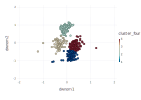

In [94]:
@chain dwnom80_df begin
    plot(x = :dwnom1, y = :dwnom2, color = :cluster_four, Geom.point)
end

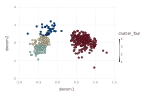

In [96]:
@chain dwnom112_df begin
    plot(x = :dwnom1, y = :dwnom2, color = :cluster_four, Geom.point)
end